In [52]:
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv("data\insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(1)

In [57]:
#seprating numerical and categorical columns
numerical_cols = df.columns[df.dtypes!="object"]
categorical_cols = df.columns[df.dtypes=="object"]
print("numerical columns:",numerical_cols)
print("categorical columns:",categorical_cols)

numerical columns: Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')


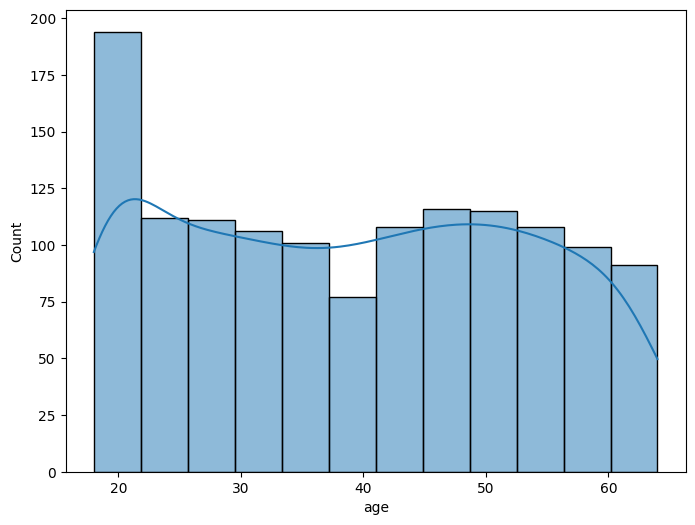

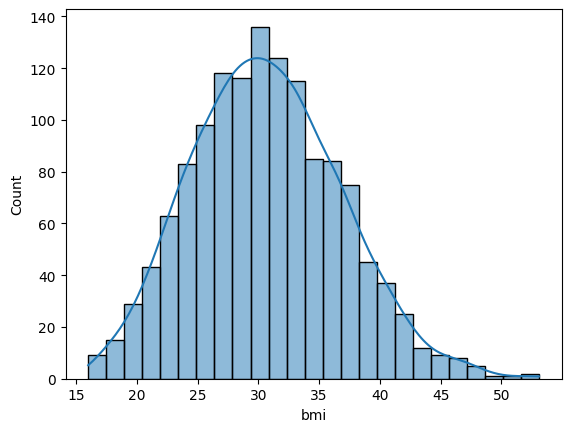

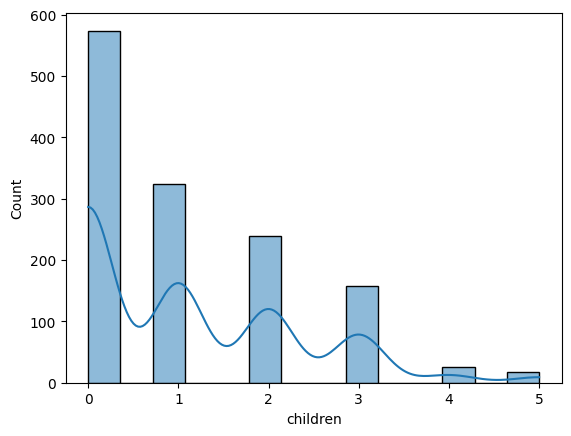

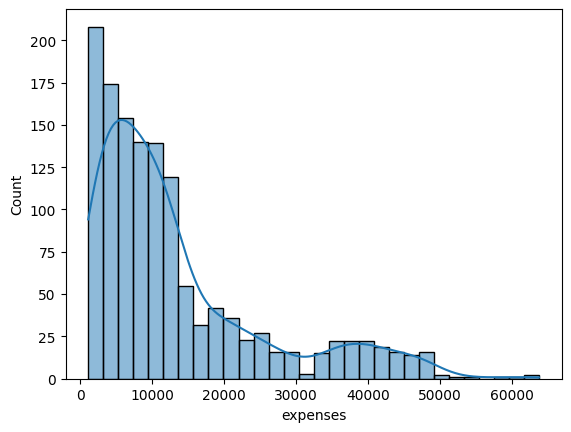

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
x=0
for i in numerical_cols:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()


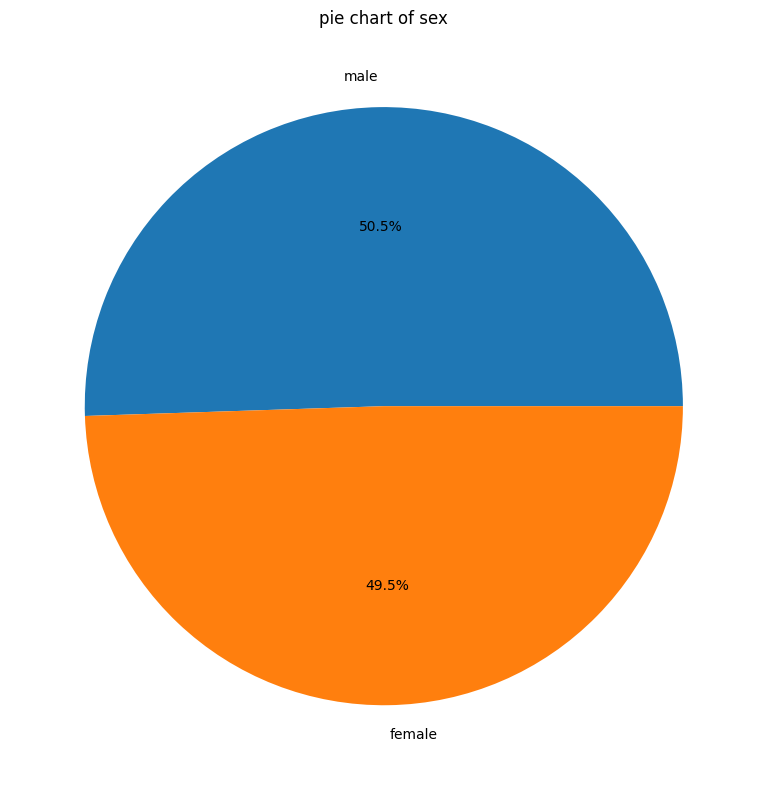

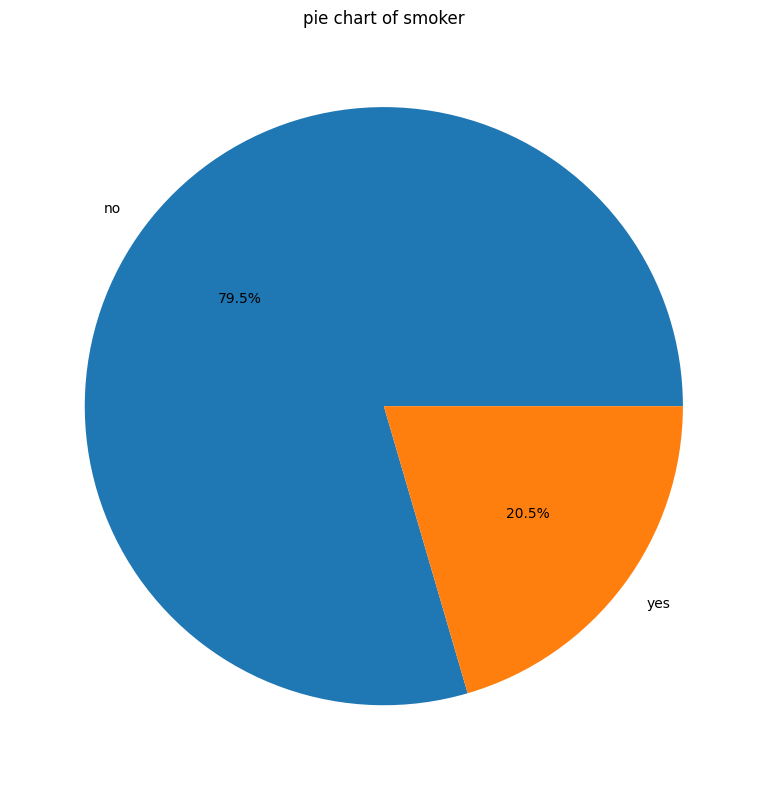

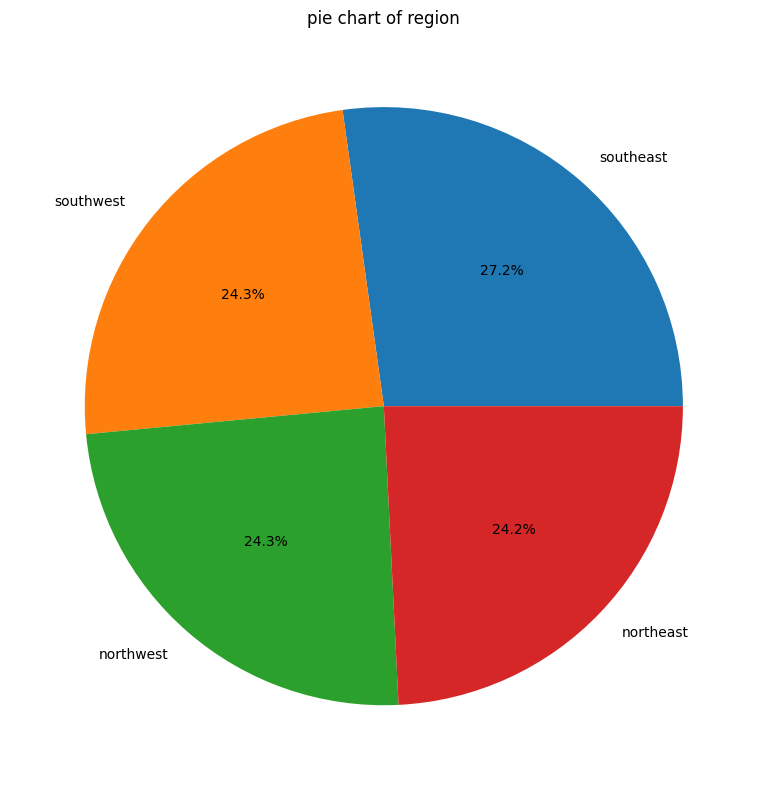

In [59]:
for i in categorical_cols :
    plt.figure(figsize = (8,8))
    plt.title(label= f'pie chart of {i}',
              loc = 'center')
    #plt.subplot(3,1,i+1)
    plt.pie(df[i].value_counts(),
            labels=df[i].value_counts().index,  
            autopct = '%1.1f%%')
    plt.tight_layout()

<Axes: >

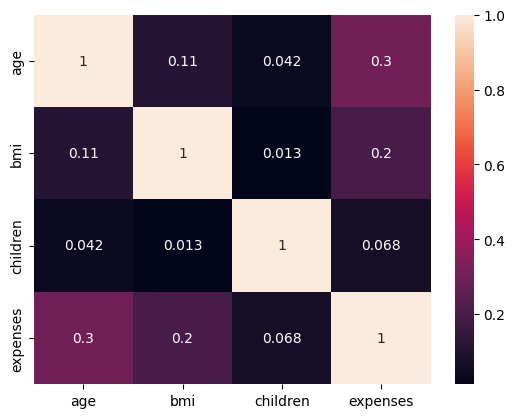

In [60]:
sns.heatmap(df[numerical_cols].corr(),annot=True)

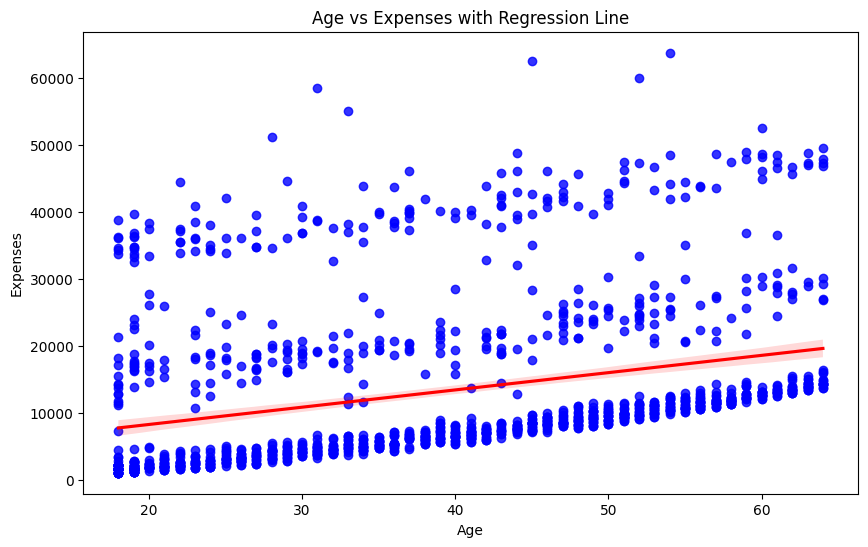

In [61]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='expenses', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Age vs Expenses with Regression Line')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()


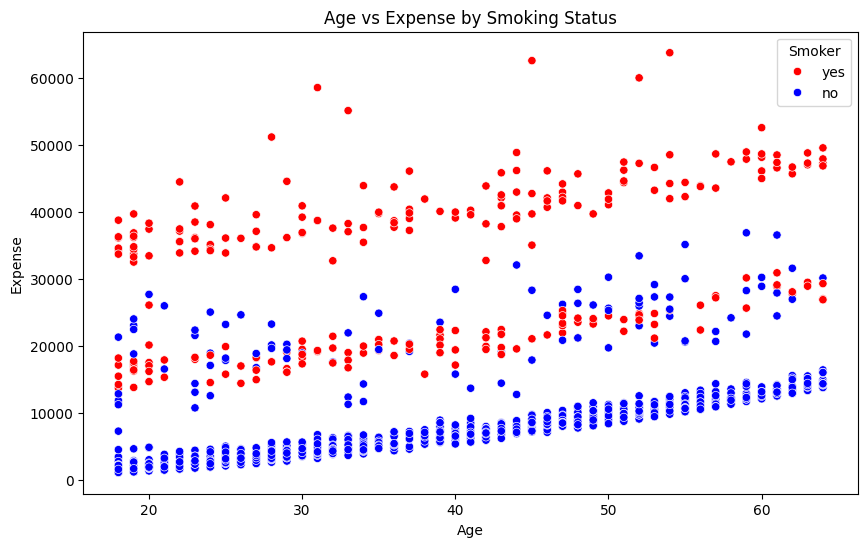

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df, palette={'yes':'red', 'no':'blue'})
plt.title('Age vs Expense by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Expense')
plt.legend(title='Smoker')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9540\1398555317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='expenses', data=df, palette={'yes':'red', 'no':'blue'})


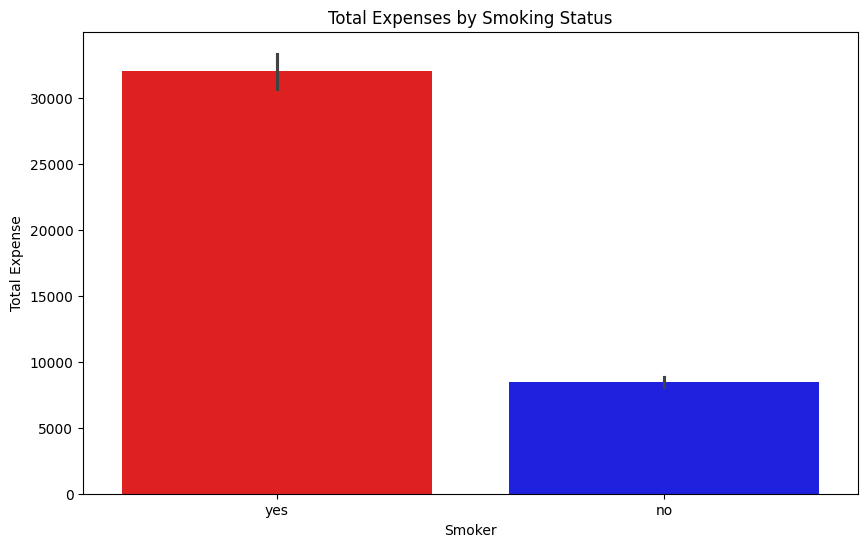

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='expenses', data=df, palette={'yes':'red', 'no':'blue'})
plt.title('Total Expenses by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Total Expense')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9540\3824262560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='expenses', data=df, palette={'male':'red', 'female':'blue'})


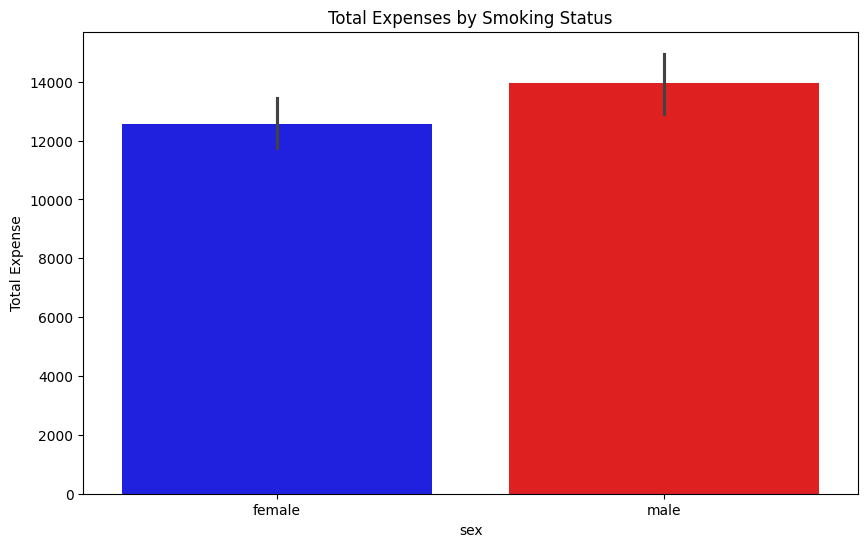

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='expenses', data=df, palette={'male':'red', 'female':'blue'})
plt.title('Total Expenses by Smoking Status')
plt.xlabel('sex')
plt.ylabel('Total Expense')
plt.show()


In [66]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [65]:
## we can see smoking affect the Expenses

In [68]:
#label encoding categorical columns
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'southwest':0,
                                 'southeast':1,
                                 'northwest':2,
                                 'northeast':3 })

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
